# Test PDPbox with binary classification problem
## Kaggle Titanic with XGBoost
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import os

%matplotlib inline

### read dataset

In [2]:
titanic = pd.read_csv('titanic_train.csv')

### simple feature engineering

#### impute null values

In [3]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].dropna().median())
titanic["Embarked"] = titanic["Embarked"].fillna("S")

#### handle categrical features

In [4]:
titanic['Sex'] = titanic['Sex'].apply(lambda x : 1 if x == 'male' else 0)
titanic = pd.get_dummies(titanic, columns=['Embarked'])

#### features to used

In [5]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

## Test XGBoost with PDPbox

In [6]:
clf = xgb.XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.05, subsample=0.85, 
                        colsample_bylevel=0.85, colsample_bytree=0.85, gamma=0.1, n_estimators=100)
clf.fit(titanic[features], titanic['Survived'])

XGBClassifier(base_score=0.5, colsample_bylevel=0.85, colsample_bytree=0.85,
       gamma=0.1, learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.85)

In [7]:
import sys
sys.path.insert(0, '../../')

## Binary feature: Sex

### target plot

In [8]:
from pdpbox import info_plots

In [ ]:
axes, df = info_plots.target_plot(titanic, 'Sex', 'sex', 'Survived', figsize=(10, 5))

In [ ]:
df

### calculate the pdp object

In [8]:
from pdpbox import pdp

In [9]:
pdp_sex = pdp.pdp_isolate(clf, titanic[features], 'Sex')

#### simple pdp line with std

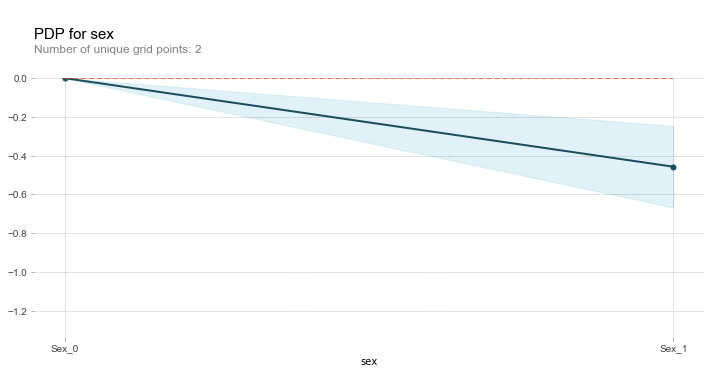

In [10]:
pdp.pdp_plot(pdp_sex, 'sex', figsize=(12, 6))

#### try to plot out the original points

In [ ]:
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, figsize=(12, 6))

#### also plot out the individual conditional expectation lines

In [ ]:
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, figsize=(12, 6))

#### try to do clustering on all the individual conditional expectation lines

In [ ]:
pdp.pdp_plot(pdp_sex, 'sex', center=True, plot_org_pts=True, frac_to_plot=0.5, cluster=True, n_cluster_centers=10, figsize=(12, 6))

In [ ]:
pdp.pdp_plot(pdp_sex, 'sex', center=True, plot_org_pts=True, frac_to_plot=0.5, 
             cluster=True, n_cluster_centers=10, cluster_method='approx', figsize=(12, 6))

#### try to customized the plot

In [ ]:
plot_params = {
    'pdp_color': 'green',
    'fill_color': 'lightgreen'
}
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, frac_to_plot=0.5, plot_params=plot_params, figsize=(12, 8))

#### try to plot out the actual predictions

In [ ]:
info_plots.actual_plot(pdp_sex, 'Sex', figsize=(12, 8))

## one-hot encoding feature: embarked
for one-hot encoding feature, should provide a list containing all the related columns

### target plot

In [ ]:
axes, df = info_plots.target_plot(titanic, ['Embarked_C', 'Embarked_S', 'Embarked_Q'], 'Embarked', 'Survived')

In [ ]:
df

In [ ]:
pdp_embark = pdp.pdp_isolate(clf, titanic[features], ['Embarked_C', 'Embarked_S', 'Embarked_Q'])

In [ ]:
pdp.pdp_plot(pdp_embark, 'Embark', center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=100)

#### try to set center=False, it's harder to tell the difference when the lines are not centered

In [ ]:
pdp.pdp_plot(pdp_embark, 'Embark', center=False, plot_org_pts=True, plot_lines=True, frac_to_plot=100)

#### try to plot out the actual predictions

In [ ]:
info_plots.actual_plot(pdp_embark, 'Embark')

## numeric feature: fare

### target plot

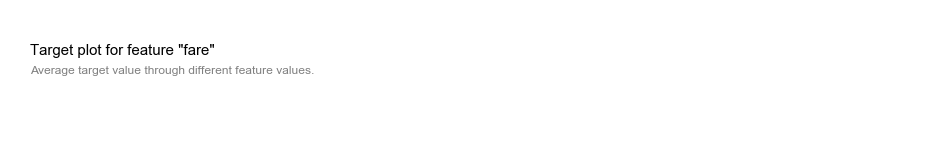

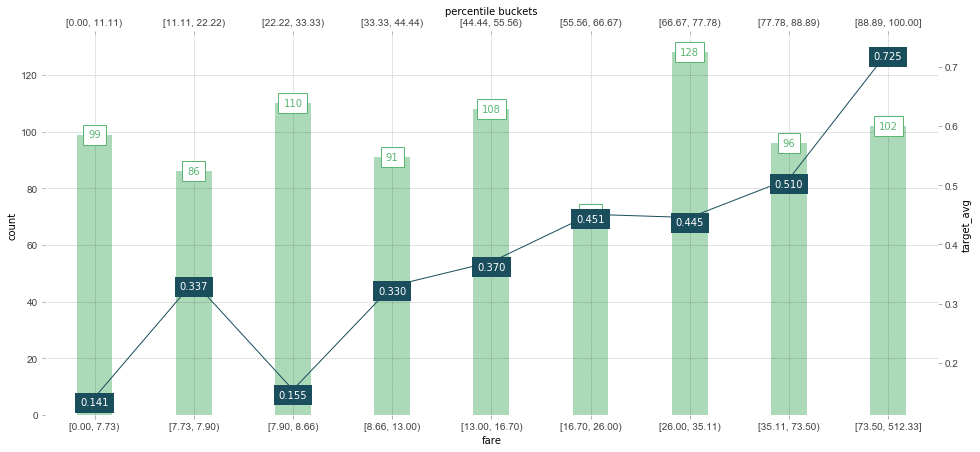

In [10]:
axes, df = info_plots.target_plot(titanic, 'Fare', 'fare', 'Survived', show_percentile=True)

In [11]:
df

,x,display_column,value_lower,value_upper,percentile_column,percentile_lower,percentile_upper,count,Survived
0,0,"[0.00, 7.73)",0.000000,7.732844,"[0.00, 11.11)",0.00,11.11,99,0.141414
1,1,"[7.73, 7.90)",7.732844,7.895800,"[11.11, 22.22)",11.11,22.22,86,0.337209
2,2,"[7.90, 8.66)",7.895800,8.662500,"[22.22, 33.33)",22.22,33.33,110,0.154545
3,3,"[8.66, 13.00)",8.662500,13.000000,"[33.33, 44.44)",33.33,44.44,91,0.329670
4,4,"[13.00, 16.70)",13.000000,16.700000,"[44.44, 55.56)",44.44,55.56,108,0.370370
5,5,"[16.70, 26.00)",16.700000,26.000000,"[55.56, 66.67)",55.56,66.67,71,0.450704
6,6,"[26.00, 35.11)",26.000000,35.111111,"[66.67, 77.78)",66.67,77.78,128,0.445312
7,7,"[35.11, 73.50)",35.111111,73.500000,"[77.78, 88.89)",77.78,88.89,96,0.510417
8,8,"[73.50, 512.33]",73.500000,512.329200,"[88.89, 100.00]",88.89,100.00,102,0.725490


In [11]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare')

#### try to plot out the actual predictions

In [ ]:
info_plots.actual_plot(pdp_fare, 'Fare')

In [ ]:
pdp.pdp_plot(pdp_fare, 'Fare')

In [ ]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True)

In [ ]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, plot_lines=True, frac_to_plot=500)

#### for numeric feature, you can set x_quantile=True to make x ticks the same as the feature grid points

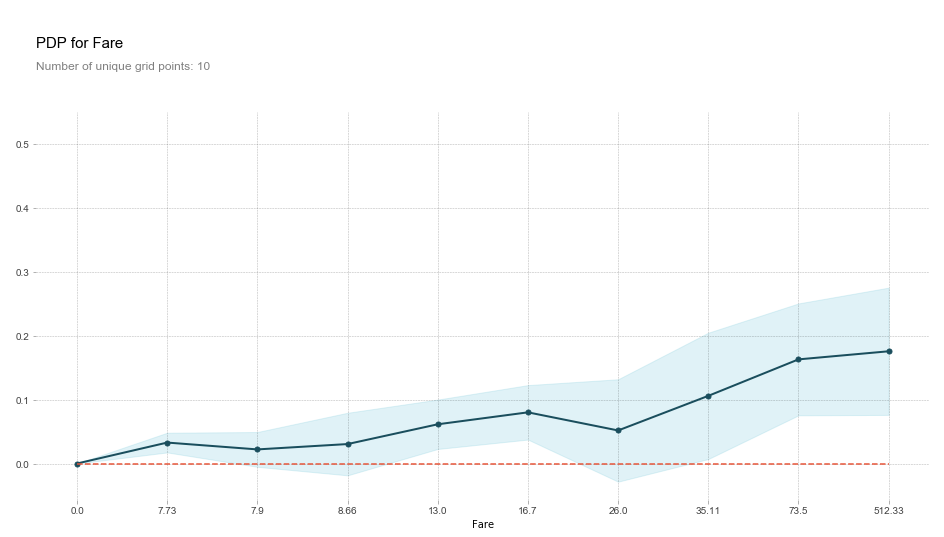

In [12]:
pdp.pdp_plot(pdp_fare, 'Fare', x_quantile=True)

#### under x_quantile=True mode, the origin points would be assign to their closest quantile

In [ ]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, x_quantile=True)

In [ ]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

#### you can also add more number of grid points for the numeric feature

In [ ]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare', num_grid_points=20)

#### try to plot out the actual predictions

In [ ]:
info_plots.actual_plot(pdp_fare, 'Fare')

In [ ]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5)

#### cluster all individual lines

In [ ]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5, x_quantile=True, cluster=True, n_cluster_centers=10)

#### try to choose a reasonable percentile range

In [ ]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare', num_grid_points=20, percentile_range=(5, 95))

#### when trying out plot out the original points with customized percentile range
you can find some original points are actually excluded from the customized percentile range

In [ ]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5)

#### sure you can set x_quantile=True if you find the plot above uncomfortable

In [ ]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5, x_quantile=True)

#### try to set center=False

In [ ]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=0.5, center=False)

#### try to customized the grid points

In [ ]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare', cust_grid_points=range(0, 100, 5))
info_plots.actual_plot(pdp_fare, 'Fare')
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

## Test interaction between two variables
### interaction between two numeric variables Age and Fare

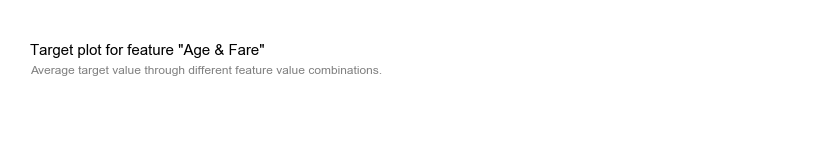

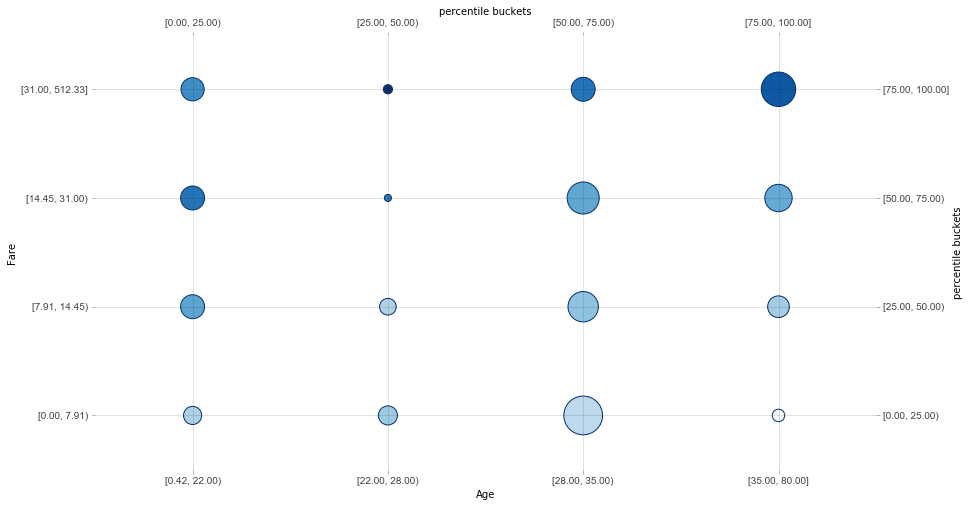

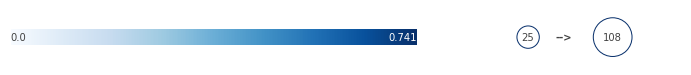

In [14]:
axes, df = info_plots.target_plot_interact(titanic, ['Age', 'Fare'], ['Age', 'Fare'], 'Survived', show_percentile=True, 
                                           figsize=(14, 8), num_grid_points=[5, 5])

In [ ]:
df

In [13]:
inter1 = pdp.pdp_interact(clf, titanic[features], ['Age', 'Fare'])

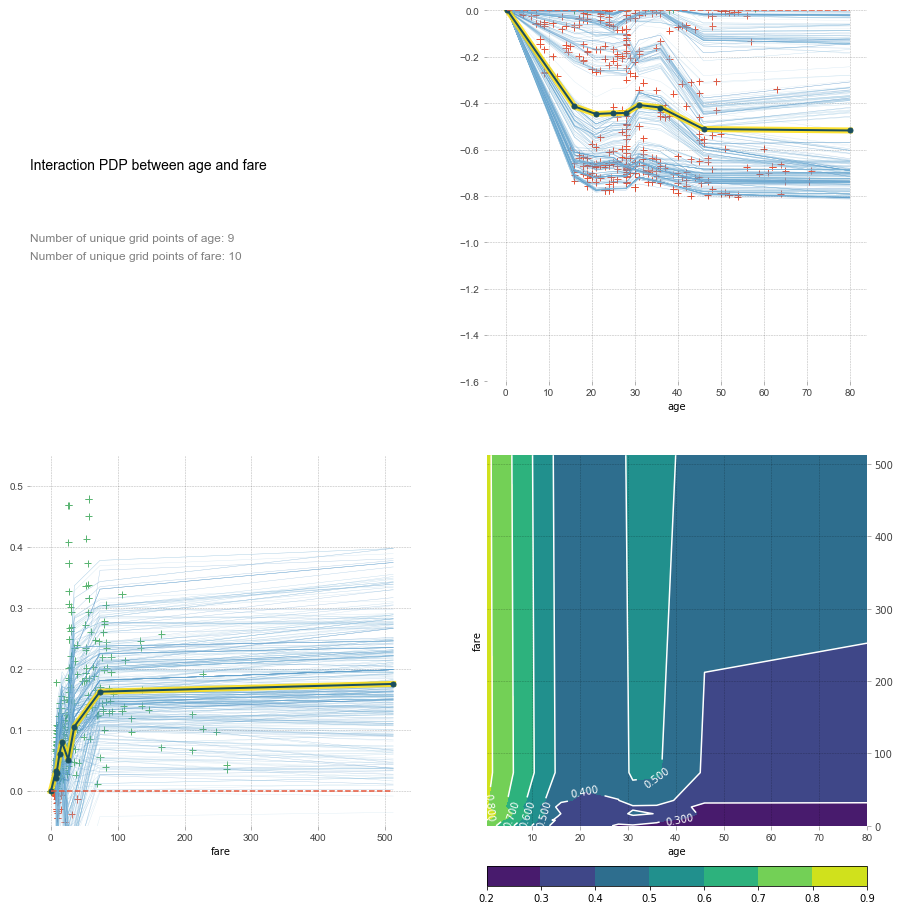

In [14]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

#### it is better to set x_quantile=True

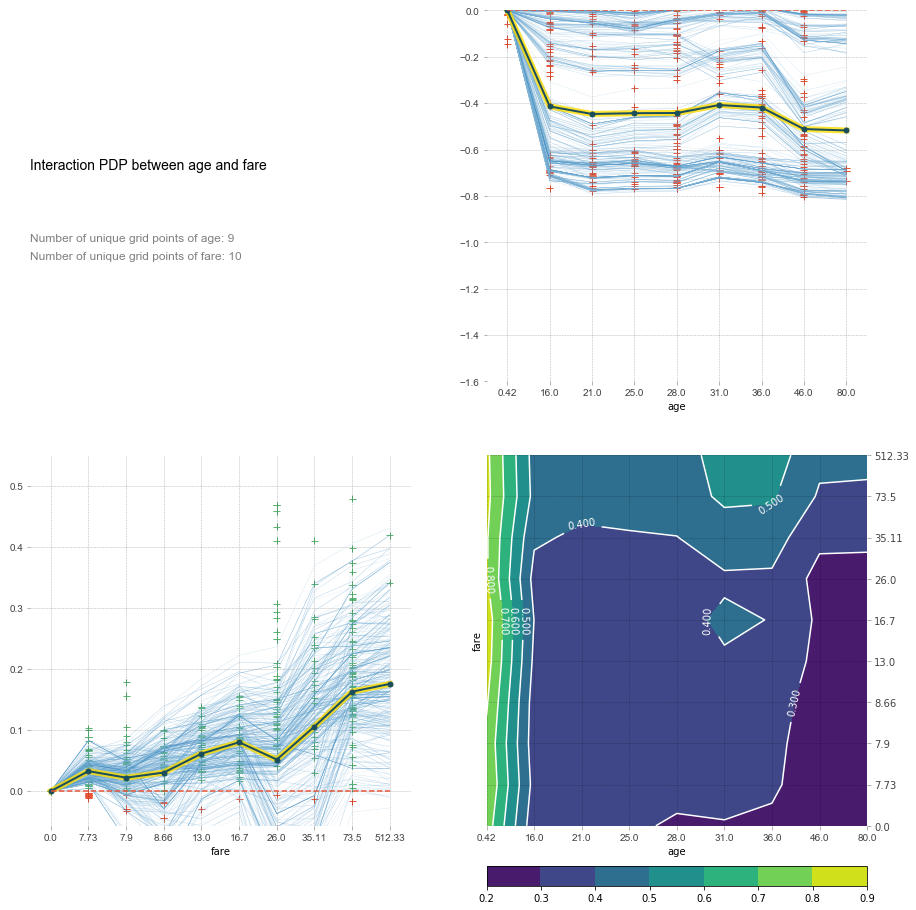

In [15]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

#### you can also only plot out the contour plot by seting only_inter=True

In [ ]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], x_quantile=True, only_inter=True)